In [1]:

from notebook_utils import *
import os, sys
sys.path.append(os.getcwd()+"/../problems")
import reset

In [2]:
embeddings = load_all_embeddings(ResetExperimentID.main, False)
count = 0
for (hardware_spec, embeddings_dict) in embeddings.items():
    count += len(embeddings_dict.keys())
count

156

In [3]:
horizon_to_num_algs = get_dict_horizon_num_algs(ResetExperimentID.main, 2, 7)

In [4]:
horizon_to_max_diffs = get_horizon_max_diffs(ResetExperimentID.main, 2, 7)

In [5]:
find_similar_algorithms(ResetExperimentID.main, 2, 7)

All algorithms seem to be different in behaviour

# Characterizing algorithms

In [5]:
# this is a dict that maps horizon --> algs_index --> List[(HardwareSpec, embedding_index)]
diff_algs_to_spec = get_diff_algorithms_to_spec(ResetExperimentID.main, reset.get_hardware_embeddings, reset.get_experiments_actions, with_thermalization=False)

In [26]:
all_summaries = []
for horizon in range(2, 8):
    all_summaries.append(get_summary_per_algo(ResetExperimentID.main, reset.get_experiments_actions, horizon, diff_algs_to_spec, drop_columns=["couplers_success"]))

In [28]:
for horizon in range(4, 8):
    file_path = os.path.join(get_project_path(), get_experiment_name_path(ResetExperimentID.main), ResetExperimentID.main.value, f"horizon{horizon}_table.csv")
    all_summaries[horizon-2].to_csv(file_path)

In [9]:
print("horizon 3")
all_summaries[1]

horizon 3


value                                                 
                      count   mean    std    min    25%    50%    75%    max
program variable                                                            
0       accum_prob     13.0  0.949  0.067  0.794  0.921  0.986  0.990  0.994
        oneq_gates     13.0  0.999  0.001  0.996  0.999  0.999  1.000  1.000
        success0       13.0  0.949  0.067  0.794  0.921  0.986  0.990  0.994
        success1       13.0  0.949  0.067  0.794  0.921  0.986  0.990  0.994
        success_diff   13.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000
1       accum_prob    120.0  0.947  0.077  0.596  0.945  0.972  0.984  0.997
        oneq_gates    120.0  0.998  0.003  0.978  0.998  0.999  1.000  1.000
        success0      120.0  0.971  0.046  0.624  0.971  0.987  0.994  0.998
        success1      120.0  0.924  0.119  0.259  0.929  0.960  0.976  0.996
        success_diff  120.0  0.047  0.096  0.000  0.009  0.019  0.038  0.675
2       accum_prob     23.0  0.878  0.105  0.611  0.790  0.903  0.964  0.995
        oneq_gates     23.0  0.997  0.005  0.978  0.997  0.999  1.000  1.000
        success0       23.0  0.836  0.156  0.352  0.714  0.898  0.956  0.994
        success1       23.0  0.921  0.071  0.766  0.871  0.954  0.979  0.995
        success_diff   23.0 -0.085  0.123 -0.518 -0.138 -0.020 -0.002 -0.000

<font color="red">Horizon 3 analysis:</font>
- program 0: contains only hardware where success 1 == success 0. Moreover, performing an X gate is very robust in these hardware.
- program 1: is the other way around.
- program 2: contains hardware specs where the success of measuring 1 is higher than the success of measuring 2.



In [10]:
print("horizon 4")
all_summaries[2]

horizon 4


value                                                 
                      count   mean    std    min    25%    50%    75%    max
program variable                                                            
0       accum_prob    141.0  0.951  0.061  0.619  0.946  0.973  0.986  0.997
        oneq_gates    141.0  0.998  0.003  0.978  0.998  0.999  1.000  1.000
        success0      141.0  0.958  0.068  0.624  0.956  0.985  0.993  0.998
        success1      141.0  0.944  0.060  0.615  0.933  0.964  0.982  0.996
        success_diff  141.0  0.014  0.042 -0.168  0.001  0.012  0.023  0.210
1       accum_prob      8.0  0.761  0.150  0.596  0.607  0.768  0.912  0.923
        oneq_gates      8.0  0.992  0.007  0.978  0.989  0.995  0.997  0.999
        success0        8.0  0.930  0.067  0.810  0.899  0.945  0.988  0.993
        success1        8.0  0.593  0.244  0.259  0.393  0.599  0.836  0.853
        success_diff    8.0  0.337  0.197  0.137  0.154  0.329  0.438  0.675
2       accum_prob      4.0  0.787  0.123  0.611  0.762  0.820  0.844  0.897
        oneq_gates      4.0  0.998  0.001  0.997  0.997  0.998  0.998  0.999
        success0        4.0  0.642  0.201  0.352  0.611  0.702  0.734  0.813
        success1        4.0  0.932  0.047  0.870  0.915  0.938  0.955  0.982
        success_diff    4.0 -0.290  0.156 -0.518 -0.308 -0.236 -0.217 -0.169
3       accum_prob      3.0  0.963  0.012  0.952  0.956  0.961  0.968  0.975
        oneq_gates      3.0  0.996  0.002  0.995  0.995  0.995  0.997  0.998
        success0        3.0  0.993  0.003  0.991  0.992  0.992  0.994  0.997
        success1        3.0  0.932  0.020  0.914  0.922  0.930  0.942  0.953
        success_diff    3.0  0.061  0.018  0.043  0.052  0.062  0.070  0.078

In [11]:
print("horizon 5")
all_summaries[3]

horizon 5


value                                                 
                     count   mean    std    min    25%    50%    75%    max
program variable                                                           
0       accum_prob    13.0  0.949  0.067  0.794  0.921  0.986  0.990  0.994
        oneq_gates    13.0  0.999  0.001  0.996  0.999  0.999  1.000  1.000
        success0      13.0  0.949  0.067  0.794  0.921  0.986  0.990  0.994
        success1      13.0  0.949  0.067  0.794  0.921  0.986  0.990  0.994
        success_diff  13.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000
1       accum_prob    73.0  0.974  0.022  0.888  0.969  0.982  0.988  0.997
        oneq_gates    73.0  0.998  0.002  0.984  0.998  0.999  1.000  1.000
        success0      73.0  0.984  0.021  0.904  0.984  0.992  0.995  0.998
        success1      73.0  0.964  0.028  0.850  0.952  0.973  0.983  0.996
        success_diff  73.0  0.019  0.022  0.000  0.006  0.013  0.022  0.137
2       accum_prob    40.0  0.935  0.066  0.619  0.920  0.964  0.971  0.984
        oneq_gates    40.0  0.999  0.001  0.992  0.999  0.999  1.000  1.000
        success0      40.0  0.957  0.063  0.624  0.958  0.976  0.986  0.995
        success1      40.0  0.914  0.075  0.615  0.893  0.943  0.960  0.975
        success_diff  40.0  0.043  0.044  0.009  0.018  0.028  0.047  0.210
3       accum_prob     4.0  0.842  0.099  0.708  0.797  0.868  0.913  0.923
        oneq_gates     4.0  0.989  0.008  0.978  0.984  0.991  0.995  0.995
        success0       4.0  0.963  0.037  0.914  0.946  0.972  0.990  0.993
        success1       4.0  0.721  0.162  0.501  0.649  0.764  0.836  0.853
        success_diff   4.0  0.242  0.125  0.140  0.154  0.208  0.297  0.413
4       accum_prob    16.0  0.871  0.088  0.726  0.790  0.898  0.957  0.983
        oneq_gates    16.0  0.998  0.002  0.993  0.997  0.999  1.000  1.000
        success0      16.0  0.826  0.117  0.685  0.707  0.842  0.940  0.977
        success1      16.0  0.916  0.072  0.766  0.868  0.938  0.978  0.991
        success_diff  16.0 -0.089  0.083 -0.238 -0.162 -0.076 -0.012 -0.002
5       accum_prob     6.0  0.942  0.076  0.791  0.955  0.963  0.984  0.995
        oneq_gates     6.0  0.995  0.009  0.978  0.997  0.999  1.000  1.000
        success0       6.0  0.941  0.076  0.790  0.952  0.961  0.983  0.994
        success1       6.0  0.943  0.076  0.791  0.956  0.966  0.984  0.995
        success_diff   6.0 -0.002  0.004 -0.010 -0.001 -0.001 -0.001 -0.000
6       accum_prob     2.0  0.597  0.001  0.596  0.596  0.597  0.597  0.598
        oneq_gates     2.0  0.995  0.006  0.990  0.993  0.995  0.997  0.999
        success0       2.0  0.894  0.057  0.854  0.874  0.894  0.914  0.934
        success1       2.0  0.300  0.058  0.259  0.280  0.300  0.320  0.341
        success_diff   2.0  0.594  0.115  0.512  0.553  0.594  0.634  0.675
7       accum_prob     1.0  0.610    NaN  0.610  0.610  0.610  0.610  0.610
        oneq_gates     1.0  0.996    NaN  0.996  0.996  0.996  0.996  0.996
        success0       1.0  0.810    NaN  0.810  0.810  0.810  0.810  0.810
        success1       1.0  0.410    NaN  0.410  0.410  0.410  0.410  0.410
        success_diff   1.0  0.400    NaN  0.400  0.400  0.400  0.400  0.400
8       accum_prob     1.0  0.611    NaN  0.611  0.611  0.611  0.611  0.611
        oneq_gates     1.0  0.998    NaN  0.998  0.998  0.998  0.998  0.998
        success0       1.0  0.352    NaN  0.352  0.352  0.352  0.352  0.352
        success1       1.0  0.870    NaN  0.870  0.870  0.870  0.870  0.870
        success_diff   1.0 -0.518    NaN -0.518 -0.518 -0.518 -0.518 -0.518

In [12]:
print("horizon 6")
all_summaries[4]

horizon 6


value                                                 
                     count   mean    std    min    25%    50%    75%    max
program variable                                                           
0       accum_prob    42.0  0.908  0.080  0.619  0.887  0.932  0.965  0.984
        oneq_gates    42.0  0.998  0.002  0.993  0.998  0.999  1.000  1.000
        success0      42.0  0.909  0.087  0.624  0.900  0.939  0.968  0.985
        success1      42.0  0.907  0.075  0.615  0.871  0.931  0.958  0.991
        success_diff  42.0  0.002  0.030 -0.115 -0.001  0.002  0.013  0.047
1       accum_prob    65.0  0.980  0.017  0.888  0.975  0.985  0.990  0.997
        oneq_gates    65.0  0.999  0.003  0.978  0.999  1.000  1.000  1.000
        success0      65.0  0.986  0.013  0.904  0.984  0.989  0.994  0.998
        success1      65.0  0.973  0.022  0.872  0.965  0.977  0.988  0.996
        success_diff  65.0  0.013  0.013 -0.010  0.003  0.009  0.020  0.061
2       accum_prob    22.0  0.939  0.063  0.708  0.926  0.962  0.973  0.983
        oneq_gates    22.0  0.996  0.005  0.978  0.995  0.998  0.999  0.999
        success0      22.0  0.984  0.019  0.914  0.982  0.990  0.994  0.997
        success1      22.0  0.895  0.108  0.501  0.883  0.932  0.952  0.970
        success_diff  22.0  0.089  0.090  0.027  0.043  0.056  0.086  0.413
3       accum_prob    12.0  0.985  0.006  0.969  0.983  0.986  0.989  0.994
        oneq_gates    12.0  0.999  0.001  0.998  0.999  0.999  0.999  1.000
        success0      12.0  0.995  0.003  0.988  0.995  0.996  0.996  0.998
        success1      12.0  0.976  0.011  0.950  0.972  0.976  0.982  0.990
        success_diff  12.0  0.019  0.008  0.008  0.015  0.020  0.022  0.038
4       accum_prob     6.0  0.864  0.071  0.773  0.816  0.862  0.912  0.960
        oneq_gates     6.0  0.998  0.003  0.993  0.997  0.998  0.999  1.000
        success0       6.0  0.786  0.103  0.693  0.700  0.760  0.856  0.935
        success1       6.0  0.943  0.049  0.853  0.934  0.955  0.978  0.985
        success_diff   6.0 -0.157  0.075 -0.238 -0.217 -0.164 -0.110 -0.049
5       accum_prob     1.0  0.923    NaN  0.923  0.923  0.923  0.923  0.923
        oneq_gates     1.0  0.987    NaN  0.987  0.987  0.987  0.987  0.987
        success0       1.0  0.993    NaN  0.993  0.993  0.993  0.993  0.993
        success1       1.0  0.853    NaN  0.853  0.853  0.853  0.853  0.853
        success_diff   1.0  0.140    NaN  0.140  0.140  0.140  0.140  0.140
6       accum_prob     4.0  0.801  0.134  0.610  0.761  0.842  0.882  0.912
        oneq_gates     4.0  0.997  0.002  0.995  0.996  0.997  0.998  0.999
        success0       4.0  0.915  0.074  0.810  0.890  0.936  0.961  0.977
        success1       4.0  0.688  0.194  0.410  0.632  0.746  0.802  0.847
        success_diff   4.0  0.227  0.120  0.130  0.159  0.190  0.258  0.400
7       accum_prob     1.0  0.789    NaN  0.789  0.789  0.789  0.789  0.789
        oneq_gates     1.0  0.999    NaN  0.999  0.999  0.999  0.999  0.999
        success0       1.0  0.705    NaN  0.705  0.705  0.705  0.705  0.705
        success1       1.0  0.873    NaN  0.873  0.873  0.873  0.873  0.873
        success_diff   1.0 -0.168    NaN -0.168 -0.168 -0.168 -0.168 -0.168
8       accum_prob     1.0  0.596    NaN  0.596  0.596  0.596  0.596  0.596
        oneq_gates     1.0  0.999    NaN  0.999  0.999  0.999  0.999  0.999
        success0       1.0  0.934    NaN  0.934  0.934  0.934  0.934  0.934
        success1       1.0  0.259    NaN  0.259  0.259  0.259  0.259  0.259
        success_diff   1.0  0.675    NaN  0.675  0.675  0.675  0.675  0.675
9       accum_prob     1.0  0.611    NaN  0.611  0.611  0.611  0.611  0.611
        oneq_gates     1.0  0.998    NaN  0.998  0.998  0.998  0.998  0.998
        success0       1.0  0.352    NaN  0.352  0.352  0.352  0.352  0.352
        success1       1.0  0.870    NaN  0.870  0.870  0.870  0.870  0.870
        success_diff   1.0 -0.518    NaN -0.518 -0.518 -0.518 -0.518 

# Plots

In [10]:
df, horizon_lines = get_df_visualizing_lambdas(ResetExperimentID.main, diff_algs_to_spec)
figsize = (10,10)

<Axes: xlabel='hardware specification', ylabel='accuracy'>

<Figure size 640x480 with 0 Axes>

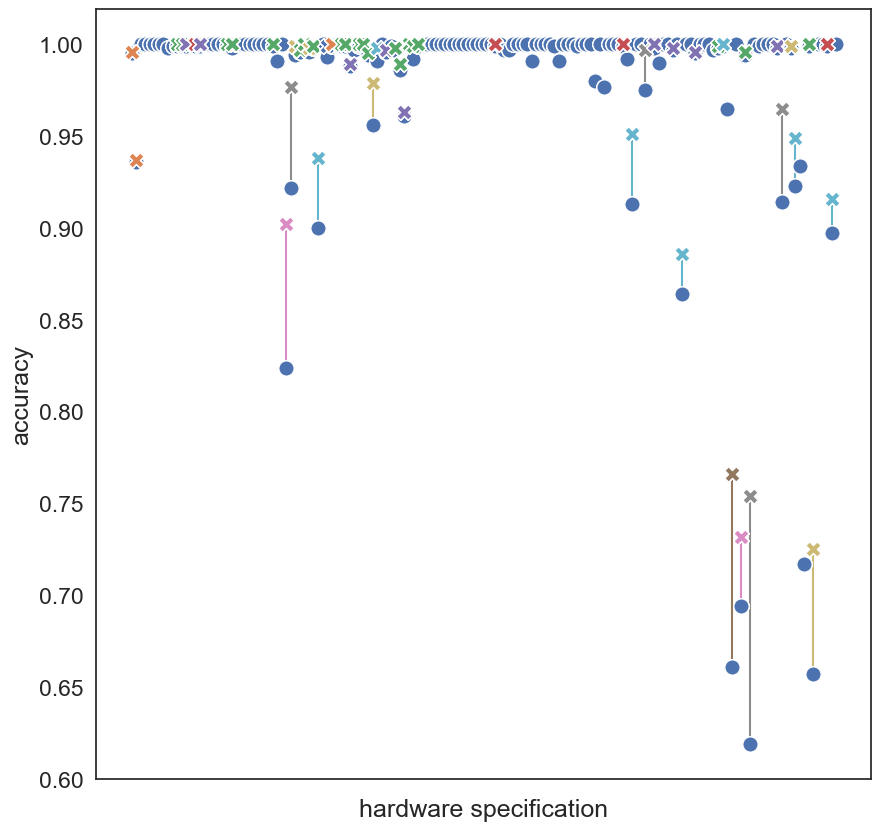

In [8]:
# for horizon in range(2, 8):
get_scatterplot_guarantees_compare(ResetExperimentID.main, 7, df, horizon_lines, horizon_to_num_algs, figsize=figsize)
    
    

<Axes: xlabel='hardware specification', ylabel='accuracy'>

<Figure size 640x480 with 0 Axes>

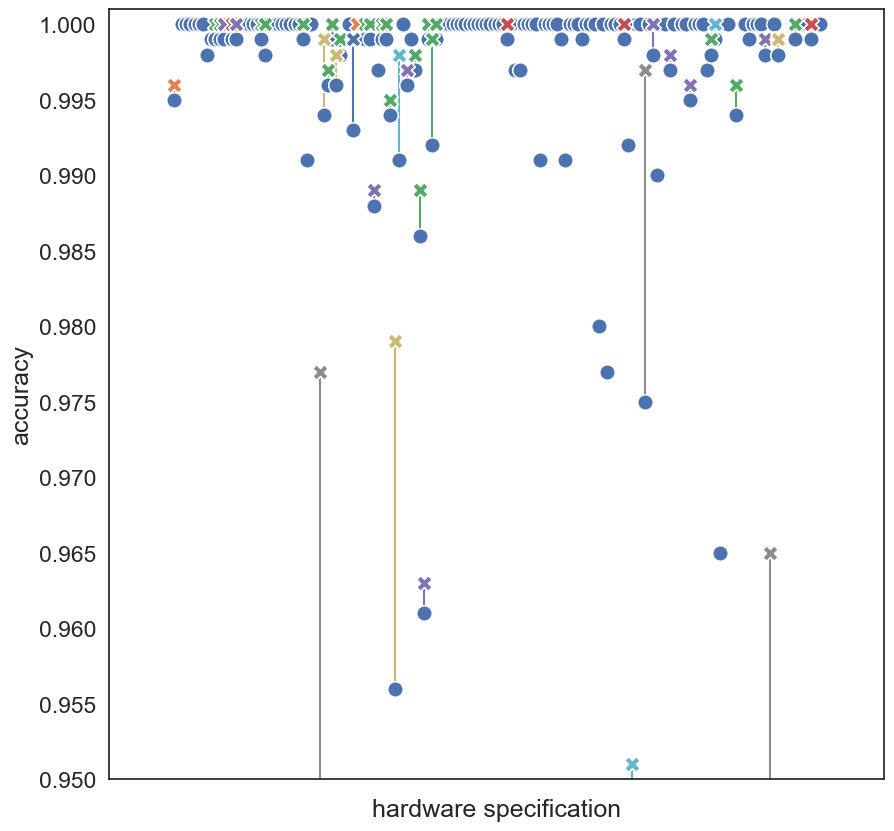

In [12]:
get_scatterplot_guarantees_compare(ResetExperimentID.main, 7, df, horizon_lines, horizon_to_num_algs, y_range=[0.95, 1.001], y_stepsize=0.005, img_name="low_noise_reset7_95", figsize=figsize)

<Axes: xlabel='hardware specification', ylabel='accuracy'>

<Figure size 640x480 with 0 Axes>

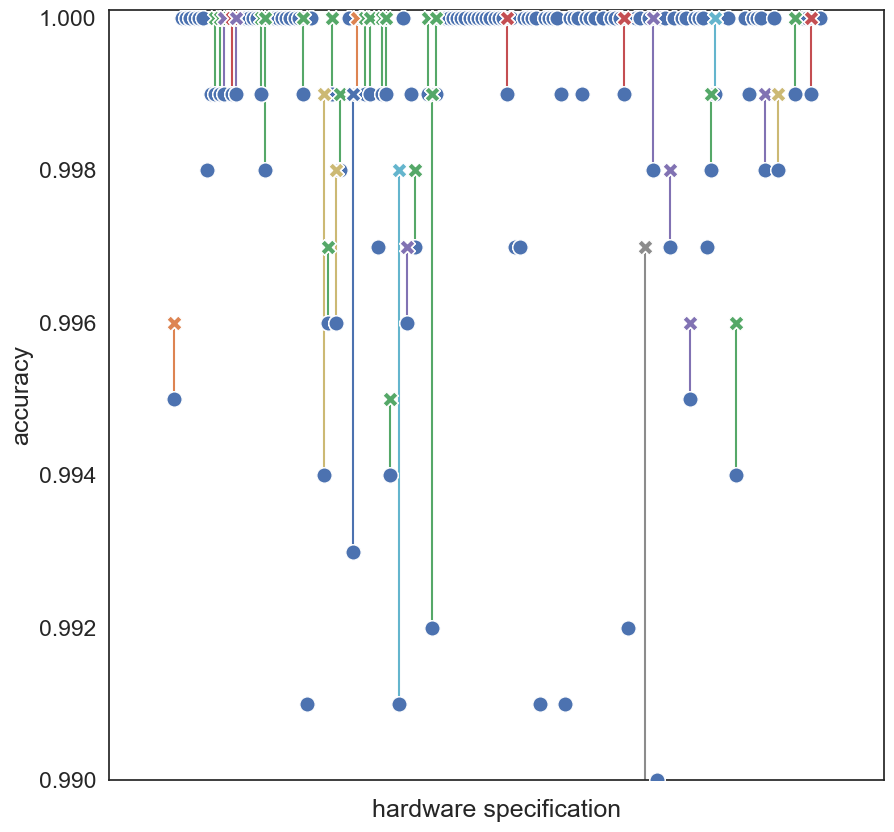

In [13]:
get_scatterplot_guarantees_compare(ResetExperimentID.main, 7, df, horizon_lines, horizon_to_num_algs, y_range=[0.99, 1.0001], y_stepsize=0.002, img_name="low_noise_reset7_99", figsize=figsize)

<Axes: xlabel='hardware specification', ylabel='accuracy'>

<Figure size 640x480 with 0 Axes>

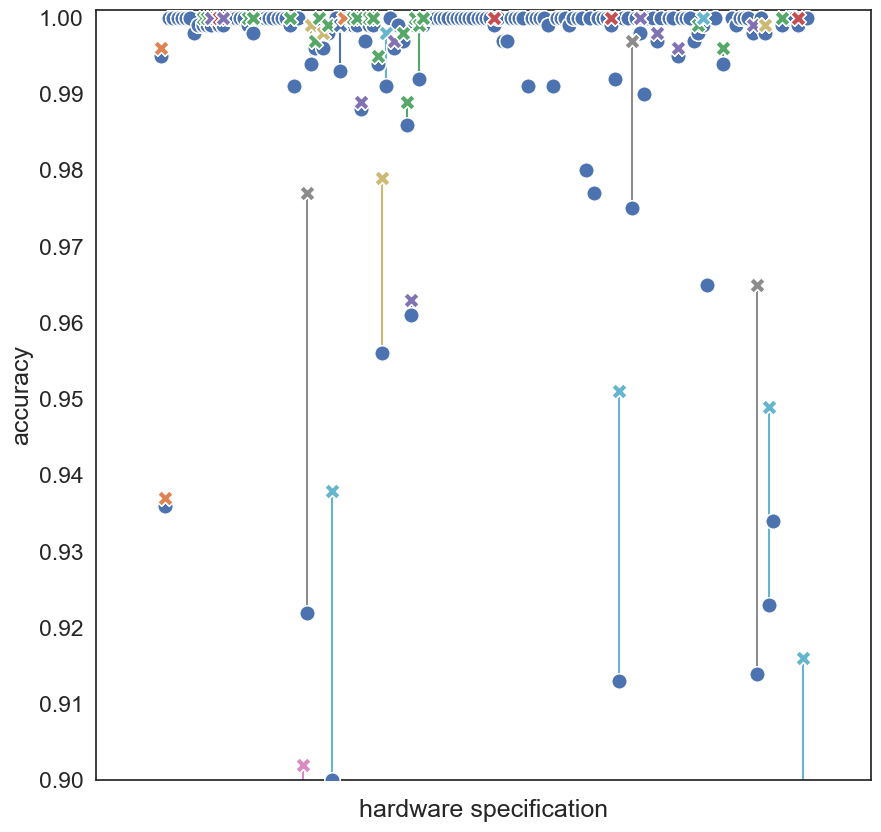

In [14]:
get_scatterplot_guarantees_compare(ResetExperimentID.main, 7, df, horizon_lines, horizon_to_num_algs, y_range=[0.90, 1.001], y_stepsize=0.01, img_name="low_noise_reset7_90", figsize=figsize)

### analysis horizon lines where improvement is in range 0.95 to 1.00

In [21]:
count_scenarios = 0
algorithms = set()
for line in horizon_lines[7]:
    ymin = line[1]
    ymax = line[2]
    
    algorithm = line[3]
    if ymin >= 0.99 and ymax > ymin:
        algorithms.add(algorithm)
        count_scenarios += 1
print(f"There are {count_scenarios} hardware scenarios")
print(f"There are {len(algorithms)} different algorithms")
    
    

There are 39 hardware scenarios
There are 12 different algorithms


In [17]:
vals = set()
for line in horizon_lines[7]:
    ymin = line[1]
    ymax = line[2]
    
    algorithm = line[3]
    if ymin >= 0.99 and ymax > ymin:
        vals.add((ymax - ymin))

max_improv = max(vals)
for line in horizon_lines[7]:
    ymin = line[1]
    ymax = line[2]
    
    algorithm = line[3]
    if ymin >= 0.99 and ymax > ymin:
        if (ymax-ymin) == max_improv:
            print(ymin, ymax)

0.991 0.998
0.992 0.999


In [ ]:
all_embeddings = load_all_embeddings(ResetExperimentID.main)
for line in horizon_lines[7]:
    ymin = line[1]
    ymax = line[2]
    
    algorithm = line[3]
    if ymin >= 0.95 and ymax > ymin:
        hardware_spec_str = line[0].split("-")[0]
        embedding_index = int(line[0].split("-")[1])
        hardware_spec = find_enum_object(hardware_spec_str, HardwareSpec)
        noise_model = NoiseModel(hardware_spec, thermal_relaxation=False)
        
        target_qubit = all_embeddings
        

In [22]:
lines

NameError: name 'lines' is not defined

In [16]:
get_best_algos_advantanges(ResetExperimentID.main, diff_algs_to_spec)

{2: {},
 3: {2: 0.07800000000000007},
 4: {1: 0.041999999999999926, 2: 0.07399999999999995},
 5: {1: 0.0020000000000000018,
  3: 0.015000000000000013,
  4: 0.06099999999999994,
  5: 0.007000000000000006,
  6: 0.07099999999999995,
  8: 0.08899999999999997,
  0: 0.0010000000000000009},
 6: {2: 0.05300000000000005,
  1: 0.0050000000000000044,
  4: 0.04999999999999993,
  3: 0.0010000000000000009,
  5: 0.008000000000000007,
  6: 0.030000000000000027,
  7: 0.010000000000000009,
  8: 0.09099999999999997,
  9: 0.11099999999999999,
  10: 0.04499999999999993},
 7: {0: 0.0010000000000000009,
  1: 0.0030000000000000027,
  3: 0.0020000000000000018,
  2: 0.0010000000000000009,
  5: 0.07800000000000007,
  6: 0.05499999999999994,
  7: 0.06799999999999995,
  8: 0.03799999999999992,
  9: 0.006000000000000005,
  10: 0.0010000000000000009,
  11: 0.007000000000000006,
  12: 0.0010000000000000009,
  13: 0.0020000000000000018,
  14: 0.10499999999999998,
  15: 0.038000000000000034,
  16: 0.135,
  17: 0.001000

In [19]:
d = get_best_algos_advantanges(ResetExperimentID.main, diff_algs_to_spec)
c = 0
for (k, vals) in d.items():
    print(k, len(vals.keys()))
    c += len(vals.keys())
c

2 0
3 1
4 2
5 7
6 10
7 17


37